# Lab 3
## More EDA: improving expertise in loading, cleaning, and analyzing data

The objective of Lab 3 is for you to become more proficient in obtaining and working with different types of data. A particular emphasis will be on dealing with text data.

This lab assignment will have 3 components. 

## Lab 3.A. Complete tutorials from Harvard's CS109 Lab 1

Go to https://github.com/cs109/2015lab1 and download the following files in your local Lab3 directory:
- https://github.com/cs109/2015lab1/blob/master/all.csv
- https://github.com/cs109/2015lab1/blob/master/hamlet.txt

We are going to go through the *Lab1-babypython.ipynb* and *Lab1-pythonpandas.ipynb*. The orginal Python notebooks were written in Python 2. We converted the notebooks into Python 3, which can be downloaded from here"

- https://github.com/CIS3715-temple-2019/CIS3715-temple-2019.github.io/blob/master/CIS3715-Lab3.A-babypython_py3.ipynb
- https://github.com/CIS3715-temple-2019/CIS3715-temple-2019.github.io/blob/master/CIS3715-Lab3.A-pythonpandas_py3.ipynb

Study all the code and run every block of code from the *babypython* tutorial. It covers many of the things you already learned in your Labs 1 and 2, so it is a good refresher. However, there are some new things. In particular, you will learn how to load a pure textual file and process it to find counts of all the unique words (also called the tokens) in the text.

Study all the code and run every block of code from the *pythonpandas* tutorial. Again, you will find there many things you already know. However, the novelty here is in processing and analysis of a slightly messy tabular data than was the case with the *Auto MPG data*.



**Deliverable**: submit the two .ipynb files after you have run all the lines of code. We will appreciate if we see that you put some extra effort, such as trying to modify existing code, enter new lines of code, or provide comments in the text. Make sure any modifications are easily visible by us for the grading purposes.

## Lab 3.B. Movie Lens Data

In this part of the lab, you will be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze MoviLens data, which contains ratings of multiple movies by multiple users.

**The MovieLens data**

http://grouplens.org/datasets/movielens/

Take some time to learn about the data, because it will be helpful to do the assignment.


In [77]:
## all imports
from IPython.display import HTML
import numpy as np
import requests
import bs4 #this is beautiful soup
import time
import operator
import socket
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
# Read the user data:
#   pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols, engine='python')

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [79]:
# Read the ratings:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols, engine='python')

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [80]:
# Read the movies data
#  the movies file contains columns indicating the movie's genres
#  let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5), engine='python', encoding='ISO-8859-1')

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Get information about the data:

In [81]:
print(movies.dtypes)
print()
print(movies.describe())
# *** Why only those two columns? ***
# Describe generates descriptive analysis that summarizes central tendency, dispersion, etc.
# This means it needs numerical data values that PEMDAS can apply to.

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


Selecting data:

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [82]:
users.head()
users['occupation'].head()
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
users[columns_you_want].head()

print(users.head())

print(users.iloc[3])

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering data:

Select users older than 25

In [83]:
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


**Question 1**: 
* show users aged 40 and male
* show the mean age of female programmers

In [84]:
users.dtypes

user_id        int64
age            int64
sex           object
occupation    object
zip_code      object
dtype: object

In [85]:
# users aged 40 AND male
# your code here
above40 = users[users.age == 40]
above40[:]
above40M = above40[above40.sex.str.match('M')]
print(above40M[:])
print()

## users who are female and programmers
# your code here
usersF = users[users.sex.str.match('F')]
usersFprog = usersF[usersF.occupation.str.match('programmer')]
print(usersFprog[:])

## show statistic summary or compute mean
# your code here
users.age.describe()

     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232
199      200   40   M  programmer    93402
283      284   40   M   executive    92629
289      290   40   M    engineer    93550
308      309   40   M   scientist    70802
357      358   40   M    educator    10022
397      398   40   M       other    60008
564      565   40   M     student    55422
646      647   40   M    educator    45810
791      792   40   M  programmer    12205
841      842   40   M      writer    93055
917      918   40   M   scientist    70116

     user_id  age sex  occupation zip_code
291      292   35   F  programmer    94703
299      300   26   F  programmer    55106
351      352   37   F  programmer    55105
403      404   29   F  programmer    55108
420      421   38   F  programmer    55105
697      698   28   F  programmer    06906


count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

Find Diligent Users

- split data per user ID
- count ratings
- combine result



In [86]:
print(ratings.head())
## split data
grouped_data = ratings.groupby('user_id')
#grouped_data = ratings['movie_id'].groupby(ratings['user_id'])

## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


**Question 2**:
* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [97]:
## split data
# your code here
per_movie_rating = ratings.groupby('movie_id')

## average and combine
# your code here
movie_rating_avg = per_movie_rating['rating'].mean()
print(movie_rating_avg.head())
print()

# get the maximum rating
# your code here
ratings_max = np.max(ratings['rating'])
print('Max rating:', ratings_max)
print()

# get movie ids with that rating
# your code here
good_movies = ratings[ratings.rating == 5]

print("Good movie ids:")
#your code here)
print(good_movies['movie_id'].head())
print()

print("Best movie titles")
# your code here
gm_titles = pd.merge(movies, good_movies, on='movie_id', how='right')
unique_gmtitles = gm_titles.drop_duplicates('title')
print(unique_gmtitles['title'].head())
print()

# get number of ratings per movie
# your code here
movie_ratesgrouped = ratings.join(ratings.groupby('movie_id').count(), on='movie_id', rsuffix='_count')
#print(movie_ratesgrouped)
r_per_movie = pd.merge(movies, movie_ratesgrouped, on='movie_id', how='inner')
r_per_movie = r_per_movie.drop_duplicates('title')

print("Number of ratings per movie:")
# your code here
print(r_per_movie[['movie_id','title','rating_count']].head())

movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64

Max rating: 5

Good movie ids:
7      465
11    1014
12     222
16     387
26      95
Name: movie_id, dtype: int64

Best movie titles
0       Toy Story (1995)
119     GoldenEye (1995)
128    Four Rooms (1995)
139    Get Shorty (1995)
168       Copycat (1995)
Name: title, dtype: object

Number of ratings per movie:
     movie_id              title  rating_count
0           1   Toy Story (1995)           452
452         2   GoldenEye (1995)           131
583         3  Four Rooms (1995)            90
673         4  Get Shorty (1995)           209
882         5     Copycat (1995)            86


**Question 3**:
* get the average rating per user
* list all occupations and if they are male or female dominant

In [98]:
# get the average rating per user
# your code here
group_user = ratings.join(ratings.groupby('user_id').mean(), on='user_id', rsuffix='_mean')
sorted_user = group_user.sort_values(by='user_id')
sorted_unique = sorted_user.drop_duplicates('user_id')
print(sorted_unique[['user_id', 'rating_mean']].head())

# list all occupations and if they are male or female dominant
# your code here
gender_dist = users.groupby(['occupation', 'sex']).count()
print(gender_dist['user_id'])
## I absolutely couldn't figure out a way to traverse through the dataframe and compare the
##   count values for if-else statements...

print('number of male users: ')
print(sum(users['sex'] == 'M'))

print('number of female users: ')
print(sum(users['sex'] == 'F'))

       user_id  rating_mean
66567        1     3.610294
9201         2     3.709677
7110         3     2.796296
68273        4     4.333333
53760        5     2.874286
occupation     sex
administrator  F       36
               M       43
artist         F       13
               M       15
doctor         M        7
educator       F       26
               M       69
engineer       F        2
               M       65
entertainment  F        2
               M       16
executive      F        3
               M       29
healthcare     F       11
               M        5
homemaker      F        6
               M        1
lawyer         F        2
               M       10
librarian      F       29
               M       22
marketing      F       10
               M       16
none           F        4
               M        5
other          F       36
               M       69
programmer     F        6
               M       60
retired        F        1
               M       13
salesma

**Question 4**:
- produce a 1-page document that uses a combination of text, tables, and figures that provide some interesting insights about the Movie Lens data. You should feel free to use outside sources to produce the report, as long as you acknowledge your sources. 

In [113]:
movies_avg = pd.DataFrame({'movie_id':movie_rating_avg.index, 'avg_ratings':movie_rating_avg.values})
##  r_per_movie = pd.merge(movies, movie_ratesgrouped, on='movie_id', how='right')
columns_merged = pd.merge(r_per_movie, movies_avg, on='movie_id', how='right')
sortByCount = columns_merged[['movie_id','title', 'rating_count','avg_ratings']].sort_values(by='rating_count',ascending=False)
print(sortByCount[:10])
print()

sortByAvg = columns_merged[['movie_id','title', 'rating_count','avg_ratings']].sort_values(by='avg_ratings',ascending=False)
print(sortByAvg[:10])
print()

above100ct = columns_merged[columns_merged['rating_count']>=100]
above100ct = above100ct[['movie_id','title', 'rating_count','avg_ratings']].sort_values(by='avg_ratings',ascending=False)
above100ct[:10]

     movie_id                          title  rating_count  avg_ratings
49         50               Star Wars (1977)         583.0     4.358491
257       258                 Contact (1997)         509.0     3.803536
99        100                   Fargo (1996)         508.0     4.155512
180       181      Return of the Jedi (1983)         507.0     4.007890
292       294               Liar Liar (1997)         485.0     3.156701
284       286    English Patient, The (1996)         481.0     3.656965
286       288                  Scream (1996)         478.0     3.441423
0           1               Toy Story (1995)         452.0     3.878319
298       300           Air Force One (1997)         431.0     3.631090
120       121  Independence Day (ID4) (1996)         429.0     3.438228

      movie_id                                              title  \
1282      1293                                    Star Kid (1997)   
1112      1122                     They Made Me a Criminal (1939)   


,movie_id,title,rating_count,avg_ratings
404,408,"Close Shave, A (1995)",112.0,4.491071
315,318,Schindler's List (1993),298.0,4.466443
168,169,"Wrong Trousers, The (1993)",118.0,4.466102
479,483,Casablanca (1942),243.0,4.456790
63,64,"Shawshank Redemption, The (1994)",283.0,4.445230
598,603,Rear Window (1954),209.0,4.387560
11,12,"Usual Suspects, The (1995)",267.0,4.385768
49,50,Star Wars (1977),583.0,4.358491
177,178,12 Angry Men (1957),125.0,4.344000
133,134,Citizen Kane (1941),198.0,4.292929


## Lab 3.C. HTML Data

In this part of the lab, you will be also be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze html data.

HTML:
* HyperText Markup Language
* standard for creating webpages
* HTML tags 
    - have angle brackets
    - typically come in pairs


Below is an example for a minimal webpage defined in HTML tags. The root tag is <html> and then you have the <head> tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The <body> tag marks the actual content of the page. You can play around with the <h2> tag trying different header levels. They range from 1 to 6. 

In [59]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags:

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`

### Scraping with Python:

Example of a simple webpage: http://www.crummy.com/software/BeautifulSoup

Good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    - try 'Ctrl-Shift I' in Chrome
    - try 'Command-Option I' in Safari
   
Different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
 
The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [60]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = requests.get(url).text
print(source)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<img align="right" src="10.1.jpg" width="250"><br />

<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</p>

<

**Question 5**:

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [61]:
## is 'Alice' in source?
if 'Alice' in source:
    print("'Alice is on homepage'")
else:
    print("'Alice' not on homepage")

## count occurences of 'Soup'
print(source.count('Soup'))

## find index of 'alien video games'
i = source.find('alien video games')
if i == -1:
    print(source.find('alien video games'))
    print("'alien video games' substring is not in homepage")

'Alice' not on homepage
45
-1
'alien video games' substring is not in homepage


**Beautiful Soup**

* designed to make your life easier
* many good functions for parsing html code

Some examples:

In [62]:
## get bs4 object
soup = bs4.BeautifulSoup(source)
 
## compare the two print statements
print(soup)
#print(soup.prettify())

## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
soup.findAll('Soup')
## Doesn't work because findAll traverses through the search tree with the
##   first letter of the string it's trying to find being what's given in the parameters.
##     There are no html tags that start with 'Soup'

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</

[]

More examples:

In [63]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')
print(first_tag)

## get attribute `href`
print(first_tag.get('href'))

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

<a href="bs4/download/"><h1>Beautiful Soup</h1></a>
bs4/download/


['bs4/download/',
 '#Download',
 'bs4/doc/',
 '#HallOfFame',
 'https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/impo

In [64]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object is not subscriptable

In [65]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# Let's verify
print(sum([l is None for l in link_list]))

# So there are two elements in the list that are None!

2


In [66]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',

*Note*: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [67]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',

Parsing the Tree:

In [68]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html
print(root_node)

## get head from root using contents
head = root_node.contents[0]
print(head)

## get body from root
body = root_node.contents[1]
print(body)

## could directly access body
tree.body

<html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>
<head><title>This is a title</title></head>
<body><h3> Test </h3><p>Hello world!</p></body>


<body><h3> Test </h3><p>Hello world!</p></body>

**Question 6**:

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)

In [69]:
## get h3 tag from body
tree.body.h3

## use ul as entry point
#soup_root = soup.html
soup.body.ul

## get hall of fame list from entry point
## skip the first entry 
hof = soup.body.ul
hof_entry = hof.contents[2:]
#print(hof_entry)

## reformat into a list containing strings
## it is ok to have a list of lists
tmp = [l.get_text() for l in hof_entry]
print(tmp)

["Reddit uses Beautiful Soup to parse\na page that's been linked to and find a representative image.\n\n", 'Alexander Harrowell uses Beautiful Soup to track the business\n activities of an arms merchant.\n\n', 'The developers of Python itself used Beautiful Soup to migrate the Python\nbug tracker from Sourceforge to Roundup.\n\n', 'The Lawrence Journal-World\nuses Beautiful Soup to gather\nstatewide election results.\n\n', 'The NOAA\'s Forecast\nApplications Branch uses Beautiful Soup in TopoGrabber, a script for\ndownloading "high resolution USGS datasets."\n\n']


`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [70]:
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
#print(test)
print('\n'.join(test))
#print(''.join(test))

Reddit uses Beautiful Soup to parse
a page that's been linked to and find a representative image.


Alexander Harrowell uses Beautiful Soup to track the business
 activities of an arms merchant.


The developers of Python itself used Beautiful Soup to migrate the Python
bug tracker from Sourceforge to Roundup.


The Lawrence Journal-World
uses Beautiful Soup to gather
statewide election results.


The NOAA's Forecast
Applications Branch uses Beautiful Soup in TopoGrabber, a script for
downloading "high resolution USGS datasets."




**Question 7**:
- Explain in detail what is Python doing in the previous line

**Answer to 7**:
The code above is a double for loop to parse through the data in the list of strings assigned to the `tmp` variable. First the outer for loop assigns each string element within the `tmp` list to `sublist` and then the inner for loop goes through each `sublist` joining them together into one string. Basically what it's doing is creating a repeat of of `tmp` but assigning it to variable `test`. I'm assuming this code was run because if I had created `tmp` as a double nested list of string elements then this code would parse the list to create one list of only string elements and **NOT** a list within a list. However, it still worked because the `.join` is a string method. Therefore everything just rendered as the same list. The `print('\n'.join(test)` then prints out the result of test by adjoining a newline after each full sentence.

**Question 8**:
- Plot a histogram of the count of the 20 most common words in the html file
- Plot a histogram of the count of the 20 most common words in the visible part (what is displayed in the browser) of the html file

**Deliverable**: For Lab 3.B and 3.C submit a modified version fo this .ipynb file that contains all the answers to the quesitons

In [119]:
## Question 8:
html_words = [l for l in soup.findAll()]
html_cwords = ["".join(str(a)) for a in html_words]
print(html_cwords)

['<html>\n<head>\n<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n<title>Beautiful Soup: We called him Tortoise because he taught us.</title>\n<link href="mailto:leonardr@segfault.org" rev="made"/>\n<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>\n<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>\n<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>\n<meta content="Leonard Richardson" name="author"/>\n</head>\n<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">\n<img align="right" src="10.1.jpg" width="250"/><br/>\n<p>You didn\'t write that awful page. You\'re just trying to get some\ndata out of it. Beautiful Soup is here to help. Since 2004, it\'s been\nsaving programmers hours or days of work on quick-turnaround\nscreen scraping projects.</p>\n<div align="center">\n<a href="bs4/download/"><h1>Beautiful Soup</h1></a>\n<p>"A tremendou

           count
if             5
as             6
for            6
3              7
projects       7
can            7
on             8
or             8
in            10
it            10
python        12
is            12
and           16
a             16
of            17
you           20
to            24
the           33
soup          35
beautiful     35


(array([8., 4., 3., 2., 0., 3.]),
 array([ 5., 10., 15., 20., 25., 30., 35.]),
 <a list of 6 Patch objects>)

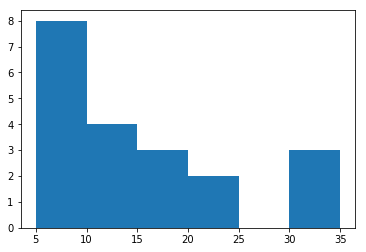

In [115]:
## Assign all text that appears in the body tag of the webpage into string variable browser_cwords as a single string.
## Then I replace specific punctuations that would hinder the split process from working properly with a blank space.
## Split the string afterwards by blank spaces and put into list `browser_tokens`
browser_cwords = [l.get_text() for l in soup.findAll('body')]
browser_cwords = browser_cwords[0].replace('\n', ' ')
browser_cwords = browser_cwords.replace('. ', ' ')
browser_cwords = browser_cwords.replace('| ', ' ')
browser_tokens = browser_cwords.split()
#print(browser_cwords)

## Reformat each string within list string browser_tokens to be lowcercase
## Create new list with only the distinct words from the browser text.
## Count and number of occurrences and put into dictionary matching with the names as keys
browser_lctokens = [word.lower() for word in browser_tokens]
browser_uniquelct = set(browser_lctokens)
btoken_dict = {}
for token in browser_uniquelct:
    btoken_dict[token] = browser_lctokens.count(token)
#print(btoken_dict)

## Create dataframe where index is made of the key values from dictionary
## Sort and get only the top 20 common words
## Lastly, plot histogram with said info
browser_df = pd.DataFrame.from_dict(btoken_dict,orient='index', columns = ['count'])
browser_df = browser_df.sort_values(['count'])
#print(browser_df)
b_dftop20 = browser_df.tail(20)
print(b_dftop20)
plt.hist(b_dftop20['count'], bins=6)